This data was sourced from the Kaggle page [here](https://www.kaggle.com/sudalairajkumar/covid19-in-usa).<br>
Data is obtained from [COVID-19 Tracking project](https://covidtracking.com/). Sincere thanks to them for making it available to the public.

Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization

The number of new cases are increasing day by day around the world. This dataset has information from 50 US states and the District of Columbia at daily level.

This notebook is using the US data from the COVID-19 Tracking project.  We calculate the US average positive result of the people tested and the average percent of those positive results that died.  Then we break the data further to look at the states with the highest percent positive results and highest percent death rate.  It is clear from the data that some states are affected far greater than others.

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
data=pd.read_csv("https://covidtracking.com/api/states.csv")

In [143]:
data

,state,positive,positiveScore,negativeScore,negativeRegularScore,commercialScore,grade,score,negative,pending,hospitalized,death,total,lastUpdateEt,checkTimeEt,dateModified,dateChecked
0,AK,22.0,1.0,1.0,1.0,1.0,A,4.0,946.0,NaN,0.0,NaN,968,3/21 16:30,3/23 16:36,2020-03-21T20:30:00Z,2020-03-23T20:36:00Z
1,AL,167.0,1.0,1.0,0.0,0.0,C,2.0,1665.0,NaN,NaN,0.0,1832,3/23 12:00,3/23 14:59,2020-03-23T16:00:00Z,2020-03-23T18:59:00Z
2,AR,174.0,1.0,1.0,1.0,1.0,A,4.0,906.0,0.0,13.0,0.0,1080,3/23 00:00,3/23 15:28,2020-03-23T04:00:00Z,2020-03-23T19:28:00Z
3,AZ,265.0,1.0,1.0,1.0,0.0,B,3.0,309.0,6.0,NaN,2.0,580,3/23 00:00,3/23 17:05,2020-03-23T04:00:00Z,2020-03-23T21:05:00Z
4,CA,1733.0,1.0,1.0,1.0,0.0,B,3.0,12567.0,12100.0,NaN,27.0,26400,3/23 00:00,3/23 16:16,2020-03-23T04:00:00Z,2020-03-23T20:16:00Z
5,CO,591.0,1.0,1.0,1.0,1.0,A,4.0,4845.0,NaN,58.0,6.0,5436,3/22 18:00,3/23 16:37,2020-03-22T22:00:00Z,2020-03-23T20:37:00Z
6,CT,415.0,1.0,1.0,1.0,1.0,A,4.0,4085.0,NaN,54.0,10.0,4500,3/23 16:00,3/23 16:38,2020-03-23T20:00:00Z,2020-03-23T20:38:00Z
7,DC,116.0,1.0,1.0,1.0,1.0,A,4.0,1113.0,NaN,NaN,2.0,1229,3/22 19:00,3/23 16:34,2020-03-22T23:00:00Z,2020-03-23T20:34:00Z
8,DE,68.0,1.0,1.0,0.0,0.0,C,2.0,36.0,NaN,0.0,0.0,104,3/23 11:15,3/23 16:37,2020-03-23T15:15:00Z,2020-03-23T20:37:00Z
9,FL,1171.0,1.0,1.0,1.0,1.0,A,4.0,11063.0,860.0,217.0,14.0,13094,3/23 11:00,3/23 16:39,2020-03-23T15:00:00Z,2020-03-23T20:39:00Z


In [144]:
#calculate the %pos and % died for each state
data['pctPositive']=round((data['positive']/data['total'])*100,1)
data['pctDied']=round((data['death']/data['positive'])*100,1)

In [145]:
#select releant columns to this notebook
columns=['state','positive','death','total','pctPositive','pctDied','hospitalized','checkTimeEt']
data = data[columns]
data.head()

,state,positive,death,total,pctPositive,pctDied,hospitalized,checkTimeEt
0,AK,22.0,NaN,968,2.3,NaN,0.0,3/23 16:36
1,AL,167.0,0.0,1832,9.1,0.0,NaN,3/23 14:59
2,AR,174.0,0.0,1080,16.1,0.0,13.0,3/23 15:28
3,AZ,265.0,2.0,580,45.7,0.8,NaN,3/23 17:05
4,CA,1733.0,27.0,26400,6.6,1.6,NaN,3/23 16:16


### Note that the % positive is only the percent of the population that were actually tested for the virus.
The actual population of people in each of the states is far greater.  The data is only able to calculate percentages based on the population sampled.  This will get broken down further below.

In [146]:
data=data.sort_values(by=['pctPositive'], ascending=True)

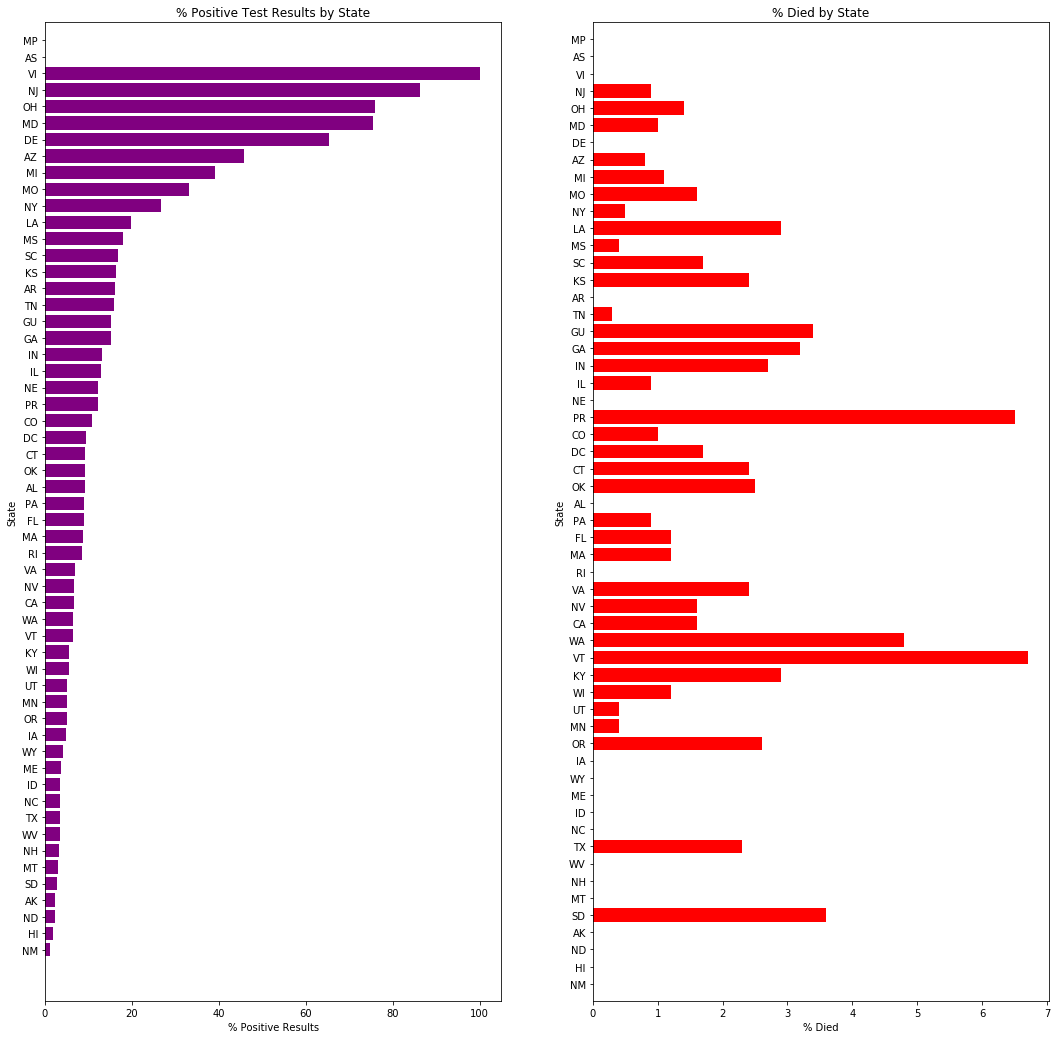

In [147]:
fig = plt.figure(figsize=(18, 18))
#data=data['pctPositive'].sort_values()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.barh(data['state'],data['pctPositive'], color='purple')
ax1.set_ylabel('State')
ax1.set_xlabel('% Positive Results')
ax1.set_title('% Positive Test Results by State')

ax2.barh(data['state'],data['pctDied'], color='red')
ax2.set_ylabel('State')
ax2.set_xlabel('% Died')
ax2.set_title('% Died by State')
plt.show()

### Pulling out data to look at overall US averages and the states most affect by the virus

In [156]:
#US population from CIA World Factbook
us_pop=332639102


In [160]:
pos_mean = data['pctPositive'].mean()
dead_mean = data['pctDied'].mean()
print('The average positive test result for the US is {0:2f}%'.format(pos_mean))
print('The average death rate for the US is {0:2f}%'.format(dead_mean))
ave_us_pos=int(us_pop*(pos_mean/100))
ave_us_dead=int(us_pos*(dead_mean/100))
print('If you look only at these values as a prediction for furture cases then:')
print('The average positive cases in the US would be {}'.format(ave_us_pos))
print('The average number of deaths would be {}'.format(ave_us_dead),'\n')
print('This is the data as of',data['checkTimeEt'].max())

The average positive test result for the US is 16.981481%
The average death rate for the US is 1.624444%
If you look only at these values as a prediction for furture cases then:
The average positive cases in the US would be 56487047
The average number of deaths would be 756495 

This is the data as of 3/23 17:06


### The above results are the averages of the US results as a whole but not all states are affected the same.  We will look at the top states affected in the next section.
For example, heavily populated states which are also international hubs have a higher infection rate than those states with minimal foreign travel and smaller populations.  In addition, if a vulnerable population within a city such as a retirement community is exposed to the virus one would likely see a much higher death rate and possibly infection rate.

In [165]:
state_min_pos = data.loc[data['pctPositive'] == pos_min, 'state'].values[0]
state_max_pos = data.loc[data['pctPositive'] == pos_max, 'state'].values[0]
state_min_dead = data.loc[data['pctDied'] == dead_min, 'state'].values[0]
state_max_dead = data.loc[data['pctDied'] == dead_max, 'state'].values[0]

print('As of', data['checkTimeEt'].max())
print('{} has the lowest number of positive cases.'.format(state_min_pos),'{} has the highest number of positive cases.'.format(state_max_pos))
print('{} has the lowest death rate.'.format(state_min_dead),'{} has the highest death rate.'.format(state_max_dead))

As of 3/23 17:06
NM has the lowest number of positive cases. VI has the highest number of positive cases.
DE has the lowest death rate. VT has the highest death rate.


In [153]:
data[data['pctPositive']==pos_min]

,state,positive,death,total,pctPositive,pctDied,hospitalized,checkTimeEt
32,NM,65.0,NaN,5386,1.2,NaN,NaN,3/23 16:56


In [154]:
data=data.sort_values(by=['pctDied'], ascending=False)

In [166]:
data.head(10)

,state,positive,death,total,pctPositive,pctDied,hospitalized,checkTimeEt
46,VT,75.0,5.0,1181,6.4,6.7,NaN,3/23 17:06
51,PR,31.0,2.0,255,12.2,6.5,NaN,3/23 16:21
47,WA,1996.0,95.0,30875,6.5,4.8,NaN,3/23 15:43
41,SD,28.0,1.0,1055,2.7,3.6,NaN,3/23 16:59
53,GU,29.0,1.0,190,15.3,3.4,NaN,3/23 16:38
10,GA,772.0,25.0,5069,15.2,3.2,NaN,3/23 16:41
18,LA,1172.0,34.0,5948,19.7,2.9,NaN,3/23 16:46
17,KY,104.0,3.0,1866,5.6,2.9,NaN,3/23 16:45
15,IN,259.0,7.0,1960,13.2,2.7,1.0,3/23 16:46
37,OR,191.0,5.0,3840,5.0,2.6,56.0,3/23 16:58


As of now there is little available to look further into demographics or breakdown by city.